In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from BigramModel import BigramModel
from striprtf.striprtf import rtf_to_text
from SentenceGenerator import SentenceGenerator

In [30]:
path = 'D:\\Projects\\Mathematical-methods-of-pattern-recognition-and-computer-vision\\lab 11'

In [31]:
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        rtf_content = file.read()
    return rtf_to_text(rtf_content)

In [32]:
train_file = 'train.txt'
test_file = 'test.txt'

train_text = load_text(train_file)
test_text = load_text(test_file)

In [33]:
bigram_model = BigramModel(text=train_text)
bigram_model.save(f'{path}\\bigram_model.txt')

In [34]:
loaded_bigram_model = BigramModel(model_filepath=f'{path}\\bigram_model.txt')
sentence_generator = SentenceGenerator(train_text)

In [35]:
test_sentences = [sentence.strip() for sentence in test_text.split('.') if sentence.strip()]
fake_sentences = [sentence_generator.generate_random_sentence() for _ in test_sentences]

In [36]:
real_likelihoods = [loaded_bigram_model.calculate_likelihood(sentence) for sentence in test_sentences]
fake_likelihoods = [loaded_bigram_model.calculate_likelihood(sentence) for sentence in fake_sentences]

In [37]:
threshold = (np.median(real_likelihoods) + np.median(fake_likelihoods)) / 2
print(f'Threshold: {threshold}')

Threshold: 9.400983137155631


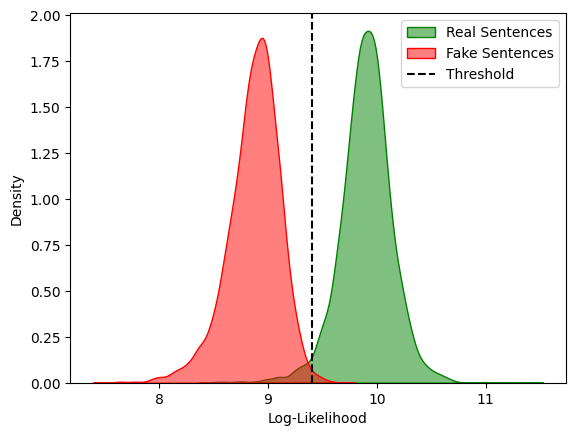

In [40]:
sns.kdeplot(real_likelihoods, label='Real Sentences', fill=True, color='green', alpha=0.5)
sns.kdeplot(fake_likelihoods, label='Fake Sentences', fill=True, color='red', alpha=0.5)
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('Log-Likelihood')
plt.ylabel('Density')
plt.show()